# Initialization

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import scqubits as qubit

import numpy as np

# Double Cooper pair tunneling Qubit

$H_\text{dcp}=4E_\text{C}[2n_\phi^2+\frac{1}{2}(n_\varphi-N_\text{g}-n_\theta)^2+xn_\theta^2]+E_\text{L}(\frac{1}{4}\phi^2+\theta^2)-2E_\text{J}\cos(\varphi)\cos(\frac{\phi}{2}+\frac{\varphi_\text{ext}}{2})$

In [2]:
dcp_qubit = qubit.Dcp(
    EJ = 15.0,
    EC = 2.0,
    EL = 1.0,
    x = 0.02,
    Ng = 0.0,
    flux = 0.5,
    N0 = 10,
    q0 = 35,
    p0 = 10
)

In [3]:
print(dcp_qubit)


DCP
 ———— PARAMETERS ————
EJ	: 15.0
EC	: 2.0
EL	: 1.0
x	: 0.02
flux	: 0.5
Ng	: 0.0
N0	: 10
q0	: 35
p0	: 10
truncated_dim	: None
Hilbert space dimension	: 7350


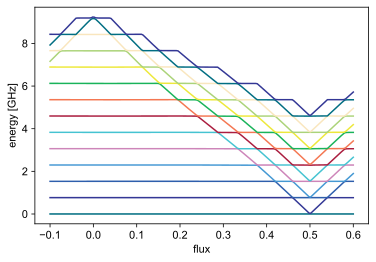

In [5]:
flux_list = np.linspace(-.1, .6, 200)
dcp_qubit.plot_evals_vs_paramvals('flux', flux_list, evals_count=14, subtract_ground=True);


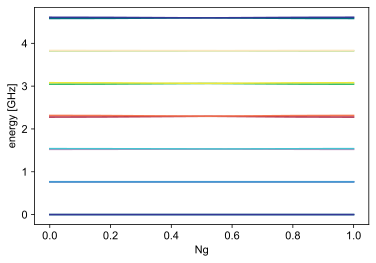

In [6]:
ng_list = np.linspace(0.0, 1.0, 200)
dcp_qubit.plot_evals_vs_paramvals('Ng', ng_list, evals_count=14, subtract_ground=True);

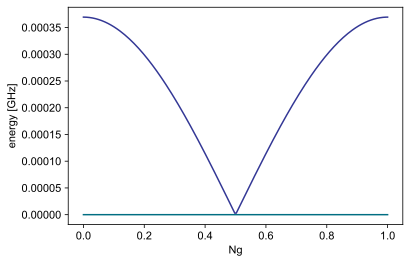

In [7]:
ng_list = np.linspace(0.0, 1.0, 200)
dcp_qubit.plot_evals_vs_paramvals('Ng', ng_list, evals_count=2, subtract_ground=True);

[Text(0, 0, '-$\\pi$'), Text(0, 0, '$\\pi$')]

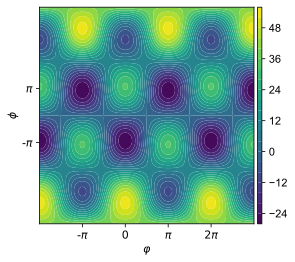

In [4]:
fig, axes = dcp_qubit.plot_potential(contour_vals=20, figsize=(4,4))
axes.set_ylabel(r'$\phi$')
axes.set_xlabel(r'$\varphi$')
axes.set_xticks([-np.pi, 0, np.pi, 2*np.pi])
axes.set_xticklabels(['-$\pi$', '$0$', '$\pi$', '$2\pi$'])
axes.set_yticks([-np.pi, np.pi])
axes.set_yticklabels(['-$\pi$', '$\pi$'])

[Text(0, 0, '-$\\pi$'), Text(0, 0, '$\\pi$')]

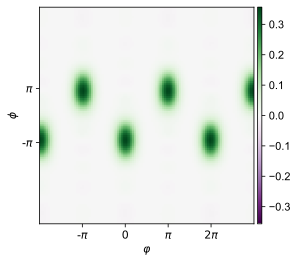

In [4]:
esys = dcp_qubit.eigensys()
fig, axes = dcp_qubit.plot_wavefunction(esys, which=0, mode='real', zero_calibrate=True, figsize=(4,4))
axes.set_ylabel(r'$\phi$')
axes.set_xlabel(r'$\varphi$')
axes.set_xticks([-np.pi, 0, np.pi, 2*np.pi])
axes.set_xticklabels(['-$\pi$', '$0$', '$\pi$', '$2\pi$'])
axes.set_yticks([-np.pi, np.pi])
axes.set_yticklabels(['-$\pi$', '$\pi$'])

[Text(0, 0, '-$\\pi$'), Text(0, 0, '$\\pi$')]

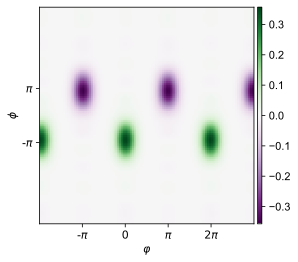

In [5]:
esys = dcp_qubit.eigensys()
fig, axes = dcp_qubit.plot_wavefunction(esys, which=1, mode='real', zero_calibrate=True, figsize=(4,4))
axes.set_ylabel(r'$\phi$')
axes.set_xlabel(r'$\varphi$')
axes.set_xticks([-np.pi, 0, np.pi, 2*np.pi])
axes.set_xticklabels(['-$\pi$', '$0$', '$\pi$', '$2\pi$'])
axes.set_yticks([-np.pi, np.pi])
axes.set_yticklabels(['-$\pi$', '$\pi$'])

[Text(0, 0, '-$\\pi$'), Text(0, 0, '$\\pi$')]

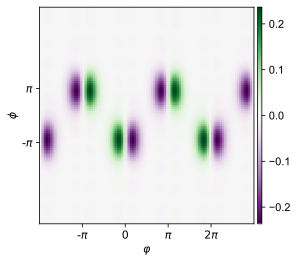

In [6]:
esys = dcp_qubit.eigensys()
fig, axes = dcp_qubit.plot_wavefunction(esys, which=2, mode='real', zero_calibrate=True, figsize=(4,4))
axes.set_ylabel(r'$\phi$')
axes.set_xlabel(r'$\varphi$')
axes.set_xticks([-np.pi, 0, np.pi, 2*np.pi])
axes.set_xticklabels(['-$\pi$', '$0$', '$\pi$', '$2\pi$'])
axes.set_yticks([-np.pi, np.pi])
axes.set_yticklabels(['-$\pi$', '$\pi$'])

[Text(0, 0, '-$\\pi$'), Text(0, 0, '$\\pi$')]

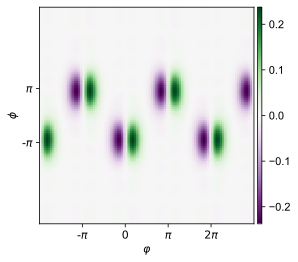

In [7]:
esys = dcp_qubit.eigensys()
fig, axes = dcp_qubit.plot_wavefunction(esys, which=3, mode='real', zero_calibrate=True, figsize=(4,4))
axes.set_ylabel(r'$\phi$')
axes.set_xlabel(r'$\varphi$')
axes.set_xticks([-np.pi, 0, np.pi, 2*np.pi])
axes.set_xticklabels(['-$\pi$', '$0$', '$\pi$', '$2\pi$'])
axes.set_yticks([-np.pi, np.pi])
axes.set_yticklabels(['-$\pi$', '$\pi$'])